In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

### Read the dataset about health and filter it by USA

In [2]:
df = pd.read_csv("PLACES_Local_Data_for_Better_Health_County_Data_2022_release_20250320.csv")

df = df[df["Data_Value_Type"].str.contains("Crude", na=False)]


# Rename the city column
df = df.rename(columns={"LocationName": "city"})


# Drop unnecessary columns
df = df.drop(['StateAbbr', 'StateDesc', 'DataSource', 'Category', 'LocationID', 'CategoryID', 'DataValueTypeID', 'Geolocation', 'TotalPopulation', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value_Footnote_Symbol', 'MeasureId', 'Data_Value_Footnote' ], axis=1)
# First, let's identify the unique cities and measures
unique_cities = df['city'].unique()
unique_measures = df['Short_Question_Text'].unique()

print(f"Number of unique cities: {len(unique_cities)}")
print(f"Number of unique measures: {len(unique_measures)}")

# Create a pivot table with cities as index and measures as columns
new_df = df.pivot_table(
    index='city',
    columns='Short_Question_Text',
    values='Data_Value',
    aggfunc='mean'  # Use mean if there are duplicate entries
)

# Reset the index to make 'city' a column again
new_df = new_df.reset_index()

# Print info about the new dataframe
print(f"Pivoted dataframe shape: {new_df.shape}")
print("Sample columns:", new_df.columns[:5].tolist())

# Display the first few rows
new_df

Number of unique cities: 1841
Number of unique measures: 30
Pivoted dataframe shape: (1840, 31)
Sample columns: ['city', 'All Teeth Lost', 'Annual Checkup', 'Arthritis', 'Binge Drinking']


Short_Question_Text,city,All Teeth Lost,Annual Checkup,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,...,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication
0,Abbeville,15.2,80.600,34.80,15.300,9.700,7.9,80.900,85.300,4.100,...,45.00,39.50,76.500,15.000,38.100,13.600,31.000,35.800,4.800,80.20
1,Acadia,17.6,77.900,29.00,18.200,10.200,6.9,78.500,85.200,3.800,...,41.80,39.50,72.500,18.700,38.300,14.700,33.600,34.700,4.400,77.70
2,Accomack,14.2,79.800,35.50,11.800,10.800,8.5,81.900,88.300,4.400,...,44.70,36.50,74.000,14.000,38.100,13.900,31.600,36.900,5.300,82.00
3,Ada,8.6,73.900,20.90,16.800,5.200,6.4,81.000,82.500,2.600,...,28.50,30.00,70.900,12.600,27.900,8.900,17.500,28.200,2.500,70.00
4,Adair,16.5,75.925,29.70,15.875,10.175,7.2,77.875,84.075,3.575,...,38.50,36.55,66.975,17.125,38.725,13.825,30.825,33.725,4.125,78.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,Yukon-Koyukuk,20.5,65.500,27.50,18.200,9.900,6.9,75.900,79.300,4.200,...,38.90,32.40,58.100,15.300,36.900,15.100,29.000,35.100,5.500,70.60
1836,Yuma,12.7,70.050,25.55,15.250,7.600,7.1,78.850,83.500,3.650,...,31.05,32.35,64.100,14.350,32.950,12.050,26.500,32.200,3.700,71.95
1837,Zapata,17.3,70.000,23.20,15.200,7.100,4.7,72.600,79.700,4.300,...,35.70,35.70,66.200,16.400,42.900,16.200,41.300,35.900,3.900,74.40
1838,Zavala,16.8,69.500,23.00,15.900,7.400,4.6,71.700,78.800,4.500,...,37.90,36.00,64.700,16.600,45.400,16.800,42.700,36.500,4.100,75.50


### Read the air quality dataset and clean the data

In [5]:
airdf = pd.read_excel("who_ambient_air_quality_database_version_2024_(v6.1).xlsx", sheet_name="Update 2024 (V6.1)")


# Filter by US
airdf = airdf[airdf["country_name"] == "United States of America"]

# Drop unnnecessary columns
airdf = airdf.drop(['country_name', 'version','reference','web_link', 'population_source','who_ms', 'type_of_stations', 'population', 'latitude', 'longitude', 'iso3', 'who_region',	'pm25_tempcov',	'no2_tempcov'], axis=1)

# Remove state from city names
airdf['city'] = airdf['city'].str.split(' ').str[0]

# Leave only year 2020
airdf = airdf[airdf['year'] == 2020.0]
airdf

,city,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov
99,Aberdeen,2020.0,NaN,NaN,NaN,NaN
243,Adrian,2020.0,NaN,8.20,NaN,NaN
502,Akron,2020.0,NaN,8.15,NaN,NaN
676,Albany,2020.0,NaN,9.10,NaN,NaN
688,Albany,2020.0,NaN,6.40,NaN,NaN
...,...,...,...,...,...,...
38850,Yakima,2020.0,NaN,12.30,NaN,NaN
39126,York,2020.0,NaN,9.30,14.0,NaN
39151,Youngstown,2020.0,NaN,7.65,NaN,NaN
39192,Yuba,2020.0,NaN,16.40,11.7,NaN


### Merge the datasets and remove duplicate cities

In [ ]:
merged_df = pd.merge(new_df, airdf, on='city', how='inner')
merged_df = merged_df.drop_duplicates(subset='city', keep='first')
merged_df

Number of unique cities: 111


,city,All Teeth Lost,Annual Checkup,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,...,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov
0,Albany,9.35,71.25,19.40,18.75,5.35,5.85,80.10,83.35,2.50,...,7.95,19.40,30.60,2.40,72.35,2020.0,NaN,9.10,NaN,NaN
2,Alexandria,6.20,73.40,19.50,16.30,4.00,5.60,87.60,88.90,2.30,...,7.10,17.60,34.40,2.20,72.10,2020.0,NaN,7.30,NaN,NaN
3,Anchorage,9.50,63.40,20.30,20.00,4.60,5.70,77.90,80.40,2.40,...,8.30,19.30,30.90,2.50,64.00,2020.0,9.767,5.25,NaN,NaN
4,Athens,14.70,77.30,26.00,18.00,9.30,5.60,75.60,78.10,2.90,...,11.10,26.50,35.80,3.10,71.60,2020.0,NaN,8.40,NaN,NaN
6,Atlantic,10.50,78.80,26.30,14.10,7.20,7.20,80.80,NaN,3.20,...,10.50,23.50,33.30,3.50,NaN,2020.0,NaN,6.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Worcester,9.40,80.20,29.75,14.55,6.90,8.25,84.25,89.40,3.20,...,9.35,23.85,30.80,3.30,78.10,2020.0,12.700,8.00,19.0,NaN
120,Yakima,13.50,67.60,24.20,13.80,7.50,6.00,77.90,79.60,3.50,...,12.90,25.50,31.10,3.60,66.40,2020.0,NaN,12.30,NaN,NaN
121,York,9.32,76.80,27.62,16.82,6.62,7.46,83.30,86.62,2.88,...,9.24,21.82,31.56,2.98,76.24,2020.0,NaN,9.30,14.0,NaN
122,Yuba,11.70,66.40,23.20,18.10,7.30,5.90,80.40,83.80,3.00,...,11.60,23.80,34.40,3.10,68.40,2020.0,NaN,16.40,11.7,NaN


Merged dataframe columns: ['city', 'All Teeth Lost', 'Annual Checkup', 'Arthritis', 'Binge Drinking', 'COPD', 'Cancer (except skin)', 'Cervical Cancer Screening', 'Cholesterol Screening', 'Chronic Kidney Disease', 'Colorectal Cancer Screening', 'Core preventive services for older men', 'Core preventive services for older women', 'Coronary Heart Disease', 'Current Asthma', 'Current Smoking', 'Dental Visit', 'Depression', 'Diabetes', 'General Health', 'Health Insurance', 'High Blood Pressure', 'High Cholesterol', 'Mammography', 'Mental Health', 'Obesity', 'Physical Health', 'Physical Inactivity', 'Sleep <7 hours', 'Stroke', 'Taking BP Medication', 'year', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov']
Correlation between air pollutants and health measures:


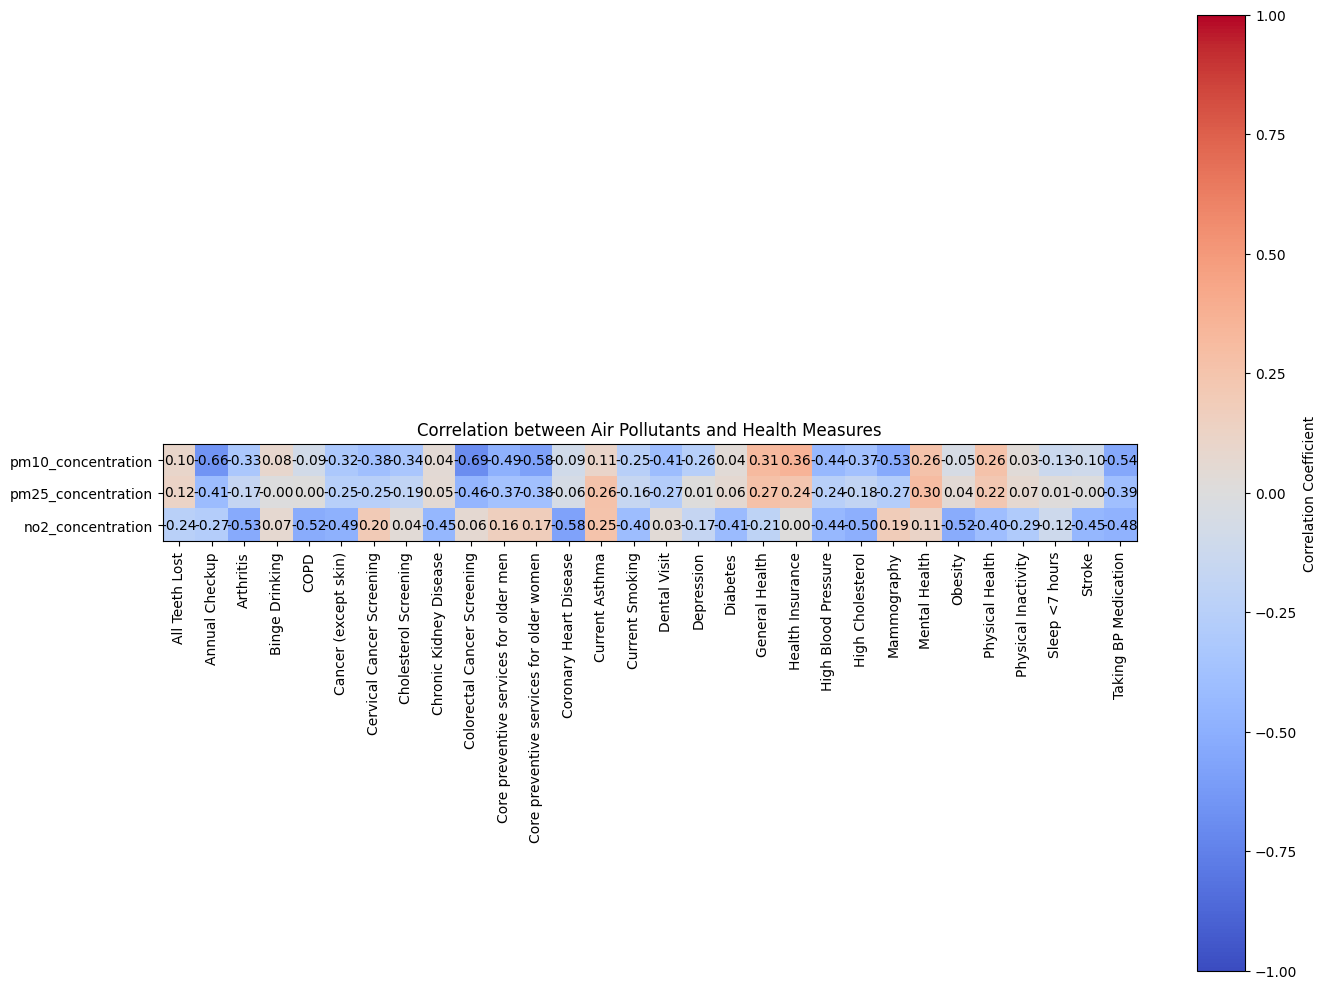

In [25]:
# Check the actual column names first
print("Merged dataframe columns:", merged_df.columns.tolist())

# Update with the correct column names for pollutants
# For example, these might be the actual names:
pollutants = ['pm10_concentration', 'pm25_concentration', 'no2_concentration']  # Update with actual column names

# Get the disease columns
disease_columns = [col for col in new_df.columns if col != 'city']

# Create a correlation matrix between pollutants and diseases
correlation_matrix = merged_df[pollutants + disease_columns].corr()

# Extract only the relevant part of the correlation matrix - pollutants vs diseases
pollutant_disease_corr = correlation_matrix.loc[pollutants, disease_columns]

# Display the correlation matrix
print("Correlation between air pollutants and health measures:")
pollutant_disease_corr

# Visualize the correlation matrix as a heatmap using only matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))
im = plt.imshow(pollutant_disease_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient')

# Add labels and title
plt.title('Correlation between Air Pollutants and Health Measures')
plt.xticks(np.arange(len(disease_columns)), disease_columns, rotation=90)
plt.yticks(np.arange(len(pollutants)), pollutants)

# Add correlation values as text annotations
for i in range(len(pollutants)):
    for j in range(len(disease_columns)):
        text = plt.text(j, i, f'{pollutant_disease_corr.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black")

plt.tight_layout()
plt.show()